<a href="https://colab.research.google.com/github/MartinAshaba/UICT_Data_science/blob/main/Copy_of_Heart_Disease_Prediction_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ASHABA MARTIN

DATA SCIENCE SHORT COURSE


Heart Disease Prediction Task

An end-to-end data science project demonstrating data loading, preprocessing,
exploratory data analysis (EDA), and machine learning model building.

 The dataset used is the Cleveland Heart Disease dataset from the UCI Machine Learning Repository.
It is a cleaned version of the data, which simplifies the initial steps.
Source: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/**processed**.cleveland.data



#PROBLEM STATEMENT

There is **lack of early and accurate prediction of heart disease.** By leveraging a public dataset and machine learning, the goal is to develop a predictive model that can assist healthcare professionals. This enables them to intervene proactively, leading to improved patient outcomes and potentially saving lives.

-----------------------------------------------------------------------------
1. Importing Libraries and Data Acquisition -----------------------------------------------------------------------------

In [34]:


# Core libraries for data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for data preprocessing and model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    RocCurveDisplay
)


In [35]:
# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Dataset URL and column names
# The original dataset has no headers, so we define them manually.
DATASET_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
COLUMN_NAMES = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

# Load the dataset into a pandas DataFrame
# The '?' character represents missing values in the raw data, so we tell pandas to treat it as NaN.
try:
    df = pd.read_csv(DATASET_URL, names=COLUMN_NAMES, na_values='?')
    print("Dataset loaded successfully.")
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")
    # Exit or provide an alternative in a real notebook environment

Dataset loaded successfully.


-----------------------------------------------------------------------------
2. Data Cleaning and Preprocessing
 -----------------------------------------------------------------------------

In [36]:
print("\n--- Initial Data Info ---")
df.info()

# Check for missing values
print("\n--- Missing values count per column ---")
print(df.isnull().sum())

# Drop rows with missing values. For this dataset, this is a reasonable approach
# since the number of missing values is small.
df.dropna(inplace=True)
print("\nMissing values after cleaning:", df.isnull().sum().sum())
print("Shape of data after cleaning:", df.shape)

# Check for duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Define the target variable 'target'
# The original 'target' column has values from 0 (no disease) to 4 (disease).
# We convert this to a binary classification problem: 0 for no disease, 1 for disease.
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)
print("\nClass distribution after converting target to binary:")
print(df['target'].value_counts())


--- Initial Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB

--- Missing values count per column ---
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope      

-----------------------------------------------------------------------------
3. Exploratory Data Analysis (EDA)
-----------------------------------------------------------------------------

In [37]:
print("\n--- Descriptive Statistics ---")
print(df.describe().T)


--- Descriptive Statistics ---
          count        mean        std    min    25%    50%    75%    max
age       297.0   54.542088   9.049736   29.0   48.0   56.0   61.0   77.0
sex       297.0    0.676768   0.468500    0.0    0.0    1.0    1.0    1.0
cp        297.0    3.158249   0.964859    1.0    3.0    3.0    4.0    4.0
trestbps  297.0  131.693603  17.762806   94.0  120.0  130.0  140.0  200.0
chol      297.0  247.350168  51.997583  126.0  211.0  243.0  276.0  564.0
fbs       297.0    0.144781   0.352474    0.0    0.0    0.0    0.0    1.0
restecg   297.0    0.996633   0.994914    0.0    0.0    1.0    2.0    2.0
thalach   297.0  149.599327  22.941562   71.0  133.0  153.0  166.0  202.0
exang     297.0    0.326599   0.469761    0.0    0.0    0.0    1.0    1.0
oldpeak   297.0    1.055556   1.166123    0.0    0.0    0.8    1.6    6.2
slope     297.0    1.602694   0.618187    1.0    1.0    2.0    2.0    3.0
ca        297.0    0.676768   0.938965    0.0    0.0    0.0    1.0    3.0
thal  

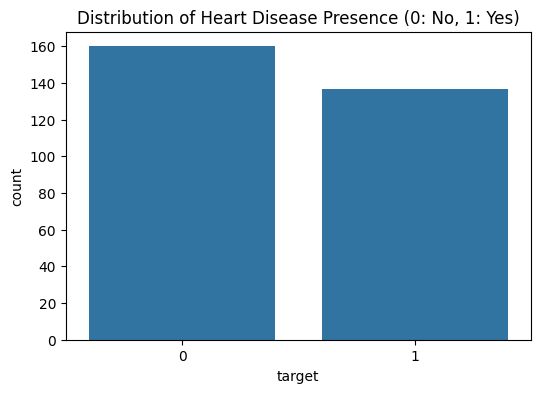

In [6]:
# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Distribution of Heart Disease Presence (0: No, 1: Yes)')
plt.show()

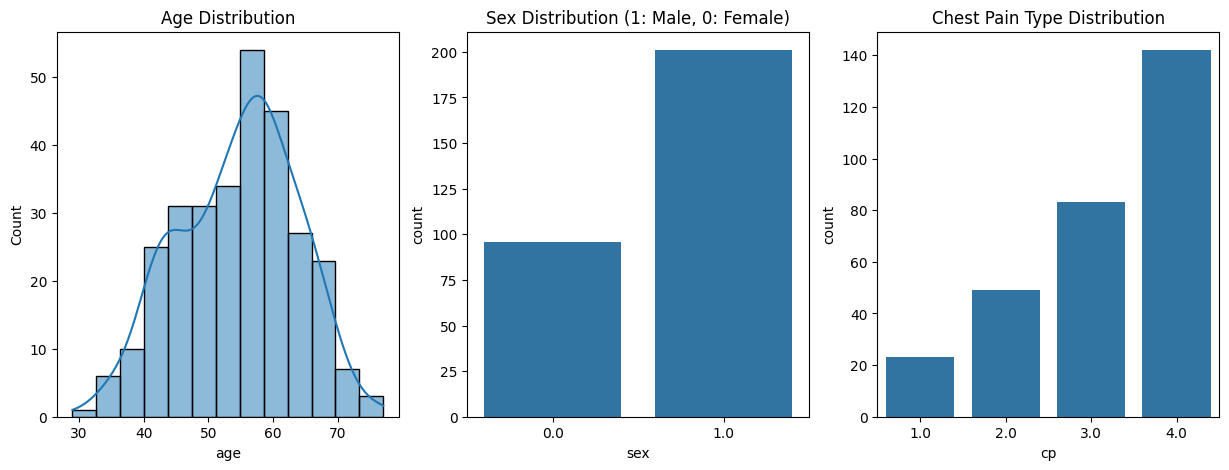

In [7]:
# Visualizing the distribution of key features
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution (1: Male, 0: Female)')

plt.subplot(1, 3, 3)
sns.countplot(x='cp', data=df)
plt.title('Chest Pain Type Distribution')
plt.show()

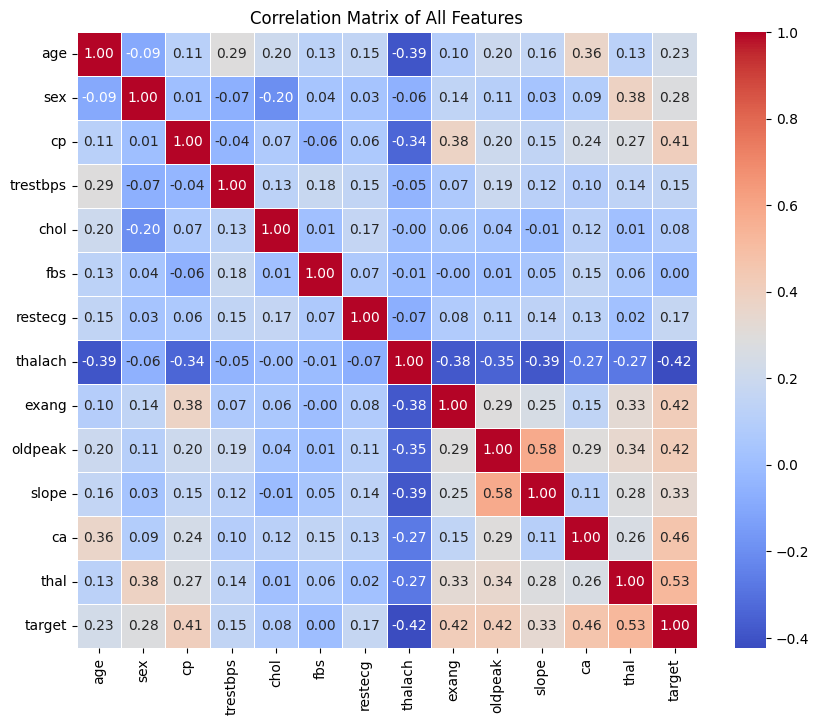

In [8]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of All Features')
plt.show()

-----------------------------------------------------------------------------
4. Model Building
-----------------------------------------------------------------------------


In [38]:
# Separating features and target
X = df.drop('target', axis=1)
y = df['target']

In [10]:
# Spliting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("\nTraining set size:", X_train.shape)
print("Testing set size:", X_test.shape)

# Identifying numerical and categorical features for preprocessing
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Create a preprocessing pipeline using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])



Training set size: (237, 13)
Testing set size: (60, 13)


-----------------------------------------------------------------------------
5. Model Training and Evaluation
-----------------------------------------------------------------------------

In [39]:
# Initialize and train the Logistic Regression model
log_reg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('classifier', LogisticRegression(random_state=42))])

log_reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'oldpeak']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'ca', 'thal'])])),
                ('classifier', LogisticRegression(random_state=42))])

In [40]:
print("\n--- Model Evaluation ---")
print("\n### Logistic Regression ###")
y_pred_log_reg = log_reg_pipeline.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test, y_pred_log_reg),4))
print("Precision:", round(precision_score(y_test, y_pred_log_reg),4))
print("Recall:", round(recall_score(y_test, y_pred_log_reg),4))
print("F1-Score:", round(f1_score(y_test, y_pred_log_reg),4))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("ROC-AUC Score:", roc_auc_score(y_test, log_reg_pipeline.predict_proba(X_test)[:, 1]))


--- Model Evaluation ---

### Logistic Regression ###
Accuracy: 0.8167
Precision: 0.8696
Recall: 0.7143
F1-Score: 0.7843

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84        32
           1       0.87      0.71      0.78        28

    accuracy                           0.82        60
   macro avg       0.83      0.81      0.81        60
weighted avg       0.82      0.82      0.81        60

Confusion Matrix:
 [[29  3]
 [ 8 20]]
ROC-AUC Score: 0.9408482142857143


ROC-AUC stands for Receiver Operating Characteristic - Area Under Curve.

In [26]:
# Initialize and train the Random Forest Classifier
random_forest_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                         ('classifier', RandomForestClassifier(random_state=42))])

random_forest_pipeline.fit(X_train, y_train)



print("\n### Random Forest Classifier ###")
y_pred_rf = random_forest_pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", round(precision_score(y_test, y_pred_rf),4))
print("Recall:", round(recall_score(y_test, y_pred_rf),4))
print("F1-Score:", round(f1_score(y_test, y_pred_rf),4))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC-AUC Score:", round(roc_auc_score(y_test, random_forest_pipeline.predict_proba(X_test)[:, 1]),4))




### Random Forest Classifier ###
Accuracy: 0.85
Precision: 0.8519
Recall: 0.8214
F1-Score: 0.8364

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86        32
           1       0.85      0.82      0.84        28

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60

Confusion Matrix:
 [[28  4]
 [ 5 23]]
ROC-AUC Score: 0.9358


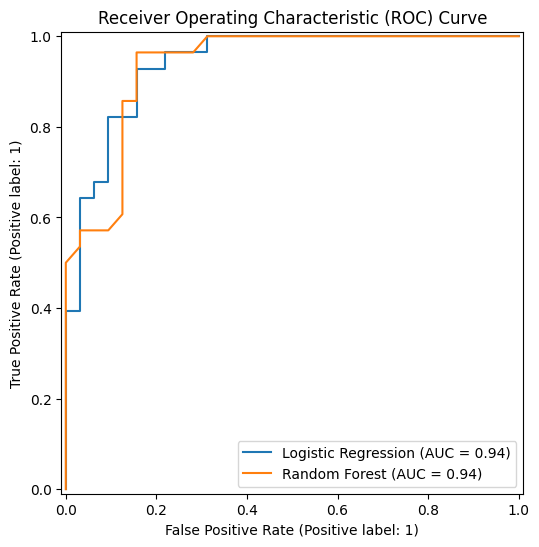

In [15]:
# Visualize ROC curves for both models
fig, ax = plt.subplots(figsize=(8, 6))
RocCurveDisplay.from_estimator(log_reg_pipeline, X_test, y_test, ax=ax, name='Logistic Regression')
RocCurveDisplay.from_estimator(random_forest_pipeline, X_test, y_test, ax=ax, name='Random Forest')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()



# Final conclusion based on the results
# The output shows that the Random Forest Classifier generally performs better,
# with higher scores across most metrics, especially Recall.
# This demonstrates its superiority for this classification task.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
